In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [2]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'HDFCBANK.NS'  # Stock symbol in uppercase

stock_data = yf.download(symbol, start=start, end=end)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000,1433.425293,8455721
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024,1427.303101,7413518
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951,1441.813232,3686941
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951,1479.655518,8834516
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000,1484.283325,4814595
...,...,...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1463.988281,7158813
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1454.877319,7598923
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976,1467.025391,5768847


In [3]:
stock_data =stock_data[['Open','High','Low','Close']]
stock_data

,Open,High,Low,Close
Date,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000
...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976


In [4]:
column ='Close'

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms= MinMaxScaler()
data = Ms.fit_transform(stock_data[[column]])
print("Length of the data {} and Shape of data {}".format(len(data),data.shape))

Length of the data 143 and Shape of data (143, 1)


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.metrics import mean_squared_error
# trends = ['n','t','c','ct']
orders = [(1,1,1),(1,2,2),(1,3,3),(1,4,4)]

from statsmodels.tsa.arima.model import ARIMA
for i in orders:
    model = ARIMA(data,order =i)
    model_fit=model.fit()
    
    test_pred = model_fit.predict(0,len(data)-1)
    test_pred
    
#     from sklearn.metrics import r2_score
#     mse = mean_squared_error(Y_test,test_pred,squared =False)
    
    from functions import rmsemape
    print("Order ={}".format(i))
    rmsemape(data,test_pred)
    print("*****************")

C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order =(1, 1, 1)
RMSE-Testset: 0.06744681485273991
maPe-Testset: 2527033380854.999
*****************
Order =(1, 2, 2)
RMSE-Testset: 0.06989586089547277
maPe-Testset: 2221964287607.8066
*****************
Order =(1, 3, 3)
RMSE-Testset: 0.077061558490724
maPe-Testset: 1170264523666.9805
*****************
Order =(1, 4, 4)
RMSE-Testset: 0.08932731579219083
maPe-Testset: 2280842039225.303
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
len(test_pred)

143

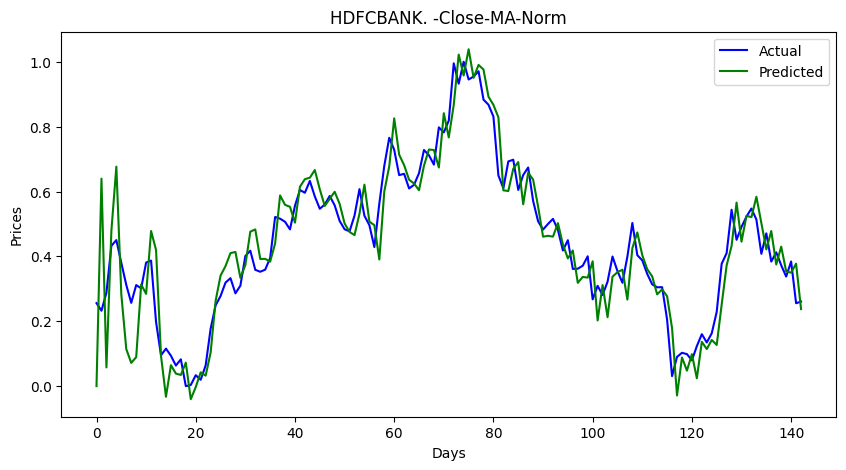

In [9]:
from functions import graph
graph(data,test_pred,"Actual","Predicted","HDFCBANK. -Close-MA-Norm","Days","Prices")

In [10]:
from functions import conversionSingle
aTestNormTable = conversionSingle(data,['Close'])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
# actual_stock_price_test_ori
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,['Close'])
actual_stock_price_test_oriA

,Close
0,1486.75
1,1480.400024
2,1495.449951
3,1534.699951
4,1539.5
...,...
138,1518.449951
139,1509.0
140,1521.599976
141,1486.650024


In [11]:
# from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(test_pred,['Close'])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,['Close'])
predicted_stock_price_test_oriP

,Close
0,1417.300049
1,1590.924928
2,1432.975098
3,1547.342223
4,1600.950208
...,...
138,1534.003686
139,1513.319356
140,1512.244732
141,1519.798253


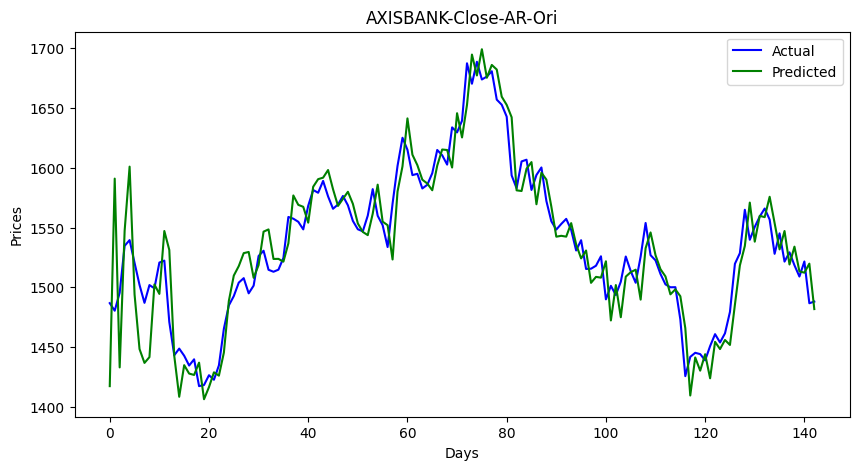

In [12]:
# from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-AR-Ori","Days","Prices")

In [13]:
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 24.243424782629898
maPe-Testset: 0.011832139065146593


In [14]:
forecast=model_fit.predict(len(data), len(data)+30)
forecast

array([ 0.26271683,  0.24600682,  0.24517326,  0.23026278,  0.22718532,
        0.21352112,  0.20866245,  0.19582826,  0.18953255,  0.17721466,
        0.16973737,  0.15769882,  0.14922897,  0.13729027,  0.1279672 ,
        0.11599183,  0.10591768,  0.09380133,  0.0830504 ,  0.07071282,
        0.05933857,  0.04671755,  0.03475783,  0.02180468,  0.00928567,
       -0.00403824, -0.01709908, -0.0308248 , -0.04441658, -0.05856949,
       -0.0726862 ])

In [15]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])
forecast_stock_price_test_oriF

,Closefore
0,1488.601372
1,1484.066276
2,1483.840047
3,1479.793346
4,1478.958123
5,1475.249659
6,1473.931018
7,1470.447819
8,1468.739166
9,1465.396091


In [16]:
forecast_stock_price_test_oriF.to_csv("CloseARIMA.csv",index=False)

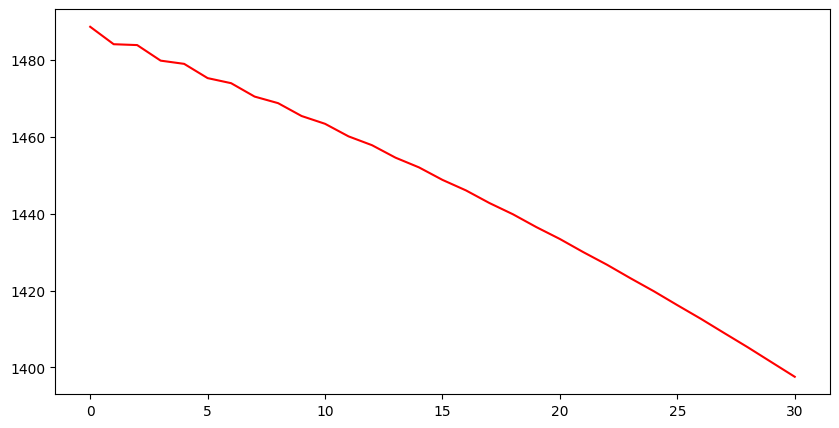

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[200:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")